In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('Loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [123]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

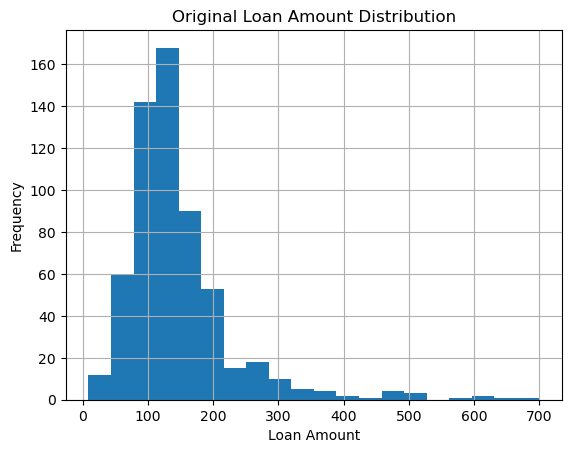

In [124]:
# Histogram
df['LoanAmount'].hist(bins=20)
plt.title("Original Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


<Axes: >

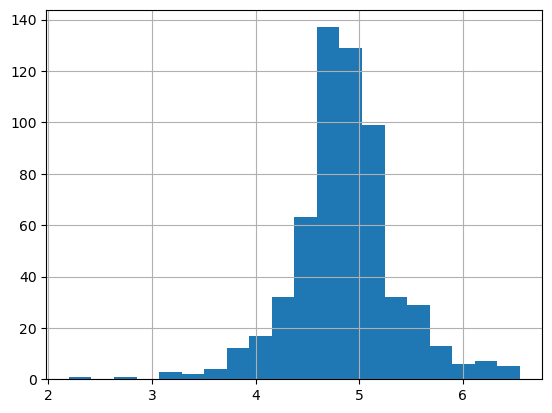

In [125]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)


In [126]:
from scipy.stats import skew
print(skew(df['LoanAmount']))


nan


In [127]:
from scipy.stats import skew
print(skew(df['LoanAmount_log']))

nan


<Axes: >

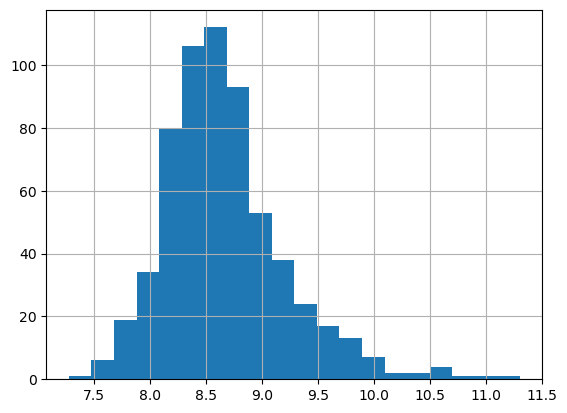

In [128]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [129]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [130]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [131]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\lijis\AppData\Local\Temp\ipykernel_21000\4125920706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

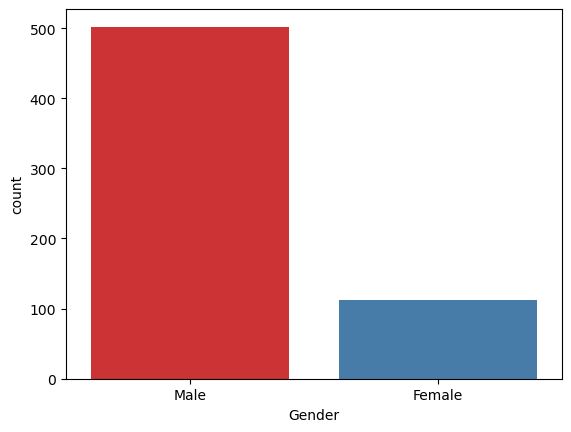

In [132]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\lijis\AppData\Local\Temp\ipykernel_21000\499500222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

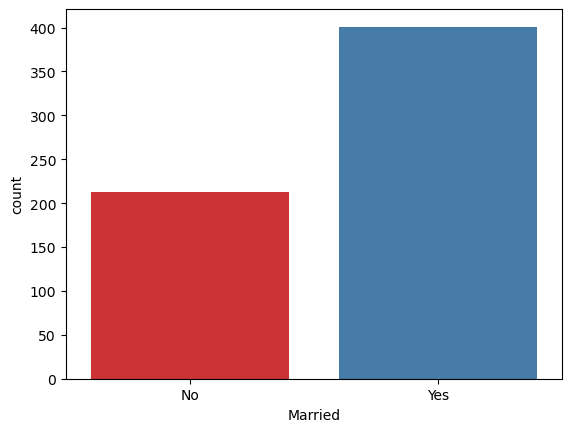

In [133]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\lijis\AppData\Local\Temp\ipykernel_21000\1924467148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

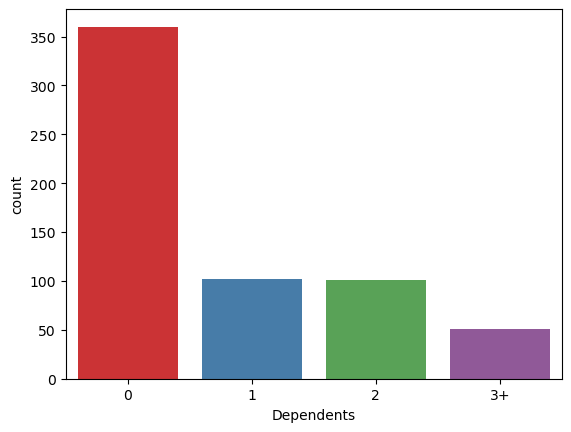

In [134]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\lijis\AppData\Local\Temp\ipykernel_21000\4286249717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=df,palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

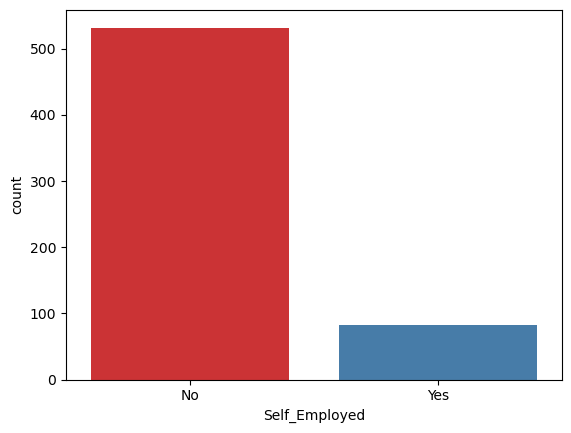

In [135]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

In [136]:
# Map the 'Dependents' column to numerical values
df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(int)
# Ensure `Dependents` column is updated
df['Dependents'] = df['Dependents'].astype(int)


In [137]:
x=df.iloc[:,np.r_[1:6,9:11,13:15]]
y=df.iloc[:,12]
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split data into training and testing sets first
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the encoder
encoder = LabelEncoder()

# Apply Label Encoding on categorical columns
x_train['Gender'] = encoder.fit_transform(x_train['Gender'])
x_test['Gender'] = encoder.transform(x_test['Gender'])

x_train['Married'] = encoder.fit_transform(x_train['Married'])
x_test['Married'] = encoder.transform(x_test['Married'])

x_train['Education'] = encoder.fit_transform(x_train['Education'])
x_test['Education'] = encoder.transform(x_test['Education'])

x_train['Self_Employed'] = encoder.fit_transform(x_train['Self_Employed'])
x_test['Self_Employed'] = encoder.transform(x_test['Self_Employed'])

# Map the 'Dependents' column to numerical values
df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(int)


In [139]:
# Initialize the encoder
encoder_y = LabelEncoder()

# Apply Label Encoding on the target variable (y)
y_train = encoder_y.fit_transform(y_train)
y_test = encoder_y.transform(y_test)

In [140]:
# Initialize StandardScaler for numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome']

# Fit StandardScaler on x_train's numerical features and transform both x_train and x_test
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])


In [141]:
from sklearn.ensemble import RandomForestClassifier

# Example usage:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [182]:
from sklearn import metrics
y_pred = rf_classifier.predict(x_test)
print('accuracy of random forest is :', metrics.accuracy_score(y_pred,y_test))

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy of random forest is : 0.7967479674796748
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.82      0.93      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.78      0.80      0.78       123



In [172]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the Naive Bayes model
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(x_train, y_train)



GaussianNB()

In [180]:
# Make predictions on the test data
y_pred_n = nb_classifier.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy
print("Accuracy of naive:", accuracy_score(y_test, y_pred_n))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_n))


Accuracy of naive: 0.8373983739837398
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

